# Assignment 4：Computational Code and Output

## 1. Introduction

### 1.1 Question

A stroke will occur when the blood flow to various areas of the brain is disrupted or diminished, the cells in those regions do not get the nutrients and oxygen and start to die (Emon et al.). According to World Health Organization (WHO) in every year 15 million people worldwide suffer a stroke. Of these, 5 million die and another 5 million are left permanently disabled, placing a burden on family and community (WHO).Early detection and proper management is required to minimize the further damage in the affected area of the brain and other complication in the body parts. 

Therefore, this project wants to determine the most influential factors in predicting the risk of a stroke. Specifically, we aimed to answer the question focused on inference: **"Which attributes have a significant impact on the likelihood of experiencing a stroke among individuals?"** 

### 1.2 Data

To answer this question, we will use the **Stroke Prediction Dataset** from Kaggle (Kaggle). The data is collected from many hospitals of Bangladesh. All procedures performed in studies involving human participants were in accordance with the ethical standards of the institutional and/or national research committee and with the 1964 Helsinki declaration and its later amendments or comparable ethical standards(Emon et al.). It includes **5110 observations with 12 attributes** like gender, age, various diseases, smoking status, stroke and relavant information about the observations. And stroke is the response varaible and the other attributes (except id) are explanatory variables.Please see the detailed information as below:
- id: unique identifier; It's numerical data.
- gender: "Male", "Female" or "Other"; It’s a categorical variable.
- age: age of the person; It's a continuous variable.
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has.It's a categorical variable.
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has.It's a categorical variable.
- ever_married: This attribute represents a person’s married status. It’s a categorical variable.
- work_type:This attribute represents the person work scenario. It’s a categorical variable.
- Residence_type: This attribute represents the person living scenario. It’s a categorical variable.
- avg_glucose_level: average glucose level in blood; It's a continuous variable.
- bmi: body mass index; It's a continuous variable.
- smoking_status: This attribute represents a person’s smoking status. It’s a categorical variable.
- stroke: 1 if the patient had a stroke or 0 if not.It’s a categorical variable.

## 2. Exploratory Data Analysis and Visualization

Load the `tidyverse`,`ggplot2`and`ggcorrplot`package for data analysis.

In [1]:
install.packages("ggcorrplot")
library(tidyverse)               
library(ggplot2)
library(ggcorrplot)
library(car)
library(glmnet)
library(broom)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



### 2.1 Data Import

In [2]:
stroke_raw <- read_csv("data/healthcare-dataset-stroke-data.csv")
#Preview the first and last 3 rows of our dataset.
head(stroke_raw, n=3)
tail(stroke_raw, n=3)

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### 2.2 Data Cleaning and Wrangling

After loading the dataset, we can notice that each variable forms a column, each observation forms a row, each type of observational unit forms a table, which means our dataset has already comes in a tidy format.
However, we will improve the dataset in below ways:
- Remove column "id" which means the unique identifer here, as there is no practical and statistical significance with stroke and id.
- Convert variable "bmi" from chr type to dbl type, as it is usually defined as a continuous variable.
- Check for NAs.
- Convert categorical variables "gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status" and "stroke"into factor type.

In [3]:
#Preview the data after removing column id
stroke <- stroke_raw %>%
select(-id)
glimpse(stroke)

Rows: 5,110
Columns: 11
$ gender            <chr> "Male", "Female", "Male", "Female", "Female", "Male"…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54, …
$ hypertension      <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1…
$ heart_disease     <dbl> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0…
$ ever_married      <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No…
$ work_type         <chr> "Private", "Self-employed", "Private", "Private", "S…
$ Residence_type    <chr> "Urban", "Rural", "Rural", "Urban", "Rural", "Urban"…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.0…
$ bmi               <chr> "36.6", "N/A", "32.5", "34.4", "24", "29", "27.4", "…
$ smoking_status    <chr> "formerly smoked", "never smoked", "never smoked", "…
$ stroke            <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


In [4]:
# change "bmi" from char to dbl, as it is usually a continuous variable.
stroke$bmi <- as.numeric(stroke$bmi)
glimpse(stroke)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Rows: 5,110
Columns: 11
$ gender            <chr> "Male", "Female", "Male", "Female", "Female", "Male"…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54, …
$ hypertension      <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1…
$ heart_disease     <dbl> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0…
$ ever_married      <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No…
$ work_type         <chr> "Private", "Self-employed", "Private", "Private", "S…
$ Residence_type    <chr> "Urban", "Rural", "Rural", "Urban", "Rural", "Urban"…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.0…
$ bmi               <dbl> 36.6, NA, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8, NA, 24…
$ smoking_status    <chr> "formerly smoked", "never smoked", "never smoked", "…
$ stroke            <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


In [5]:
#use is.na check for NAs and know that we have 201 NAs in our bmi
#and ask for professor advice that nothing should be done to those NAs at this time
stroke_NA <-colSums(is.na(stroke))
stroke_NA 

gender               age      hypertension     heart_disease 
                0                 0                 0                 0 
     ever_married         work_type    Residence_type avg_glucose_level 
                0                 0                 0                 0 
              bmi    smoking_status            stroke 
              201                 0                 0

In [6]:
# change all categorical variables into factor type
# variables_to_convert <- c("gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke")
variables_to_convert <- c("gender","work_type", "Residence_type", "smoking_status")


stroke <- stroke %>%
  mutate_at(vars(all_of(variables_to_convert)), as.factor)

glimpse(stroke)


Rows: 5,110
Columns: 11
$ gender            <fct> Male, Female, Male, Female, Female, Male, Male, Fema…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54, …
$ hypertension      <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1…
$ heart_disease     <dbl> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0…
$ ever_married      <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No…
$ work_type         <fct> Private, Self-employed, Private, Private, Self-emplo…
$ Residence_type    <fct> Urban, Rural, Rural, Urban, Rural, Urban, Rural, Urb…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.0…
$ bmi               <dbl> 36.6, NA, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8, NA, 24…
$ smoking_status    <fct> formerly smoked, never smoked, never smoked, smokes,…
$ stroke            <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


### 2.3 Visualization

After group discussion, as everyone can only has 1 visualization, we decided to use various visualizations. I used a **correlation matrix visualization** showing the correlation between all the variables. Therefore, based on the visualization, our group can see the relevancy of variables and prepare for the potential problems we will face. My group member Sean chose the combination of boxplots (to show continuous explanatory variables vs stroke) and barcharts(to show categorical explanatory variables vs stroke). Wendy chose boxplots to explore the correlation between categorical and continuous variables. And Dedoria focused on the relationship of age, gender, hypertension, heart_disease, bmi and average_glucose_level vs stroke (based on his research question).

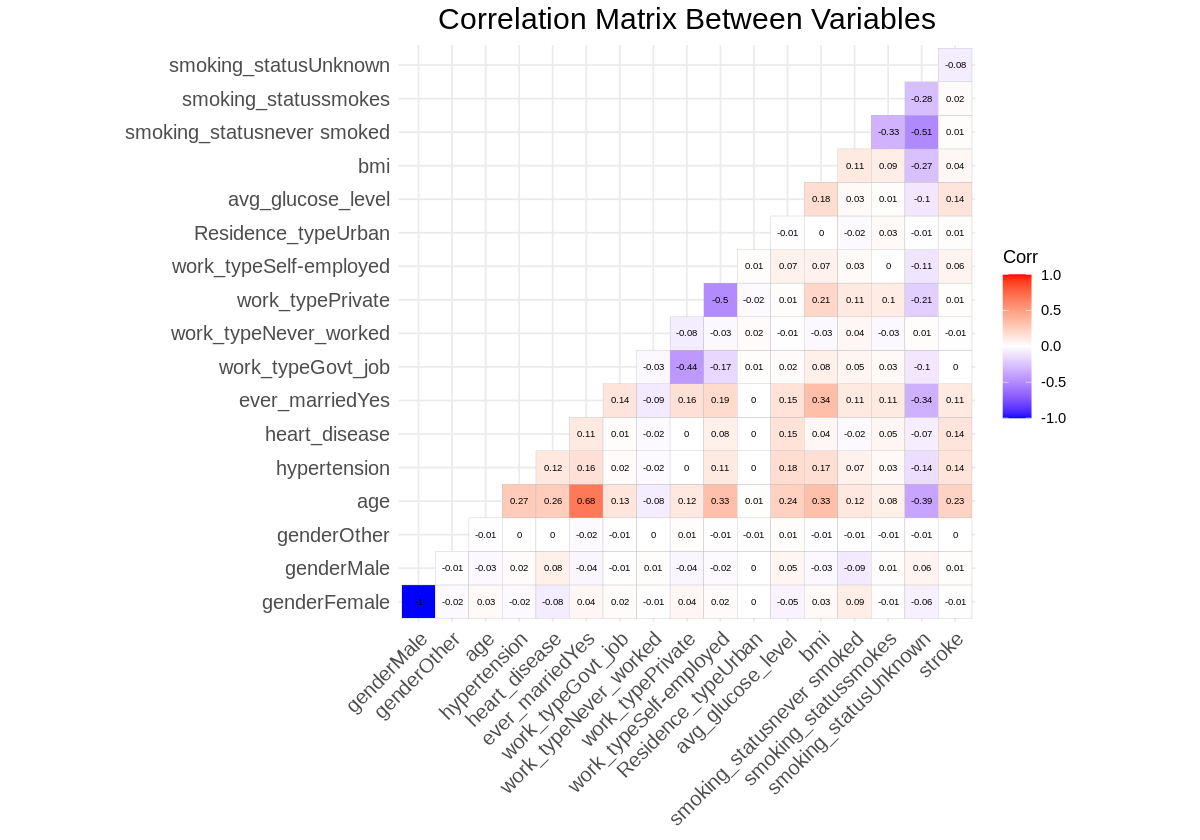

In [7]:
options(repr.plot.width = 10, repr.plot.height = 7)
model.matrix(~0+., data=stroke ) %>% 
  cor(use="pairwise.complete.obs") %>% 
  ggcorrplot(show.diag=FALSE, type="lower",lab=TRUE, lab_size=2)+
  ggtitle("Correlation Matrix Between Variables")+
theme(
    plot.title = element_text(size = 18, hjust = 0.5) 
  )

Based on the plot, the following observations can be made:
- There is no strong correlation between the "stroke" variable and the other attributes at this point. However, five variables, namely **"age"(0.23)**, **"hypertension1"** (0.14,indicating whether the patient has hypertension), **"heart_disease1"** (0.14,indicating whether the patient has heart disease), **"ever_marriedYes"** (0.11,indicating marital status), and **"avg_glucose_level(0.14),"** exhibit a positive correlation with "stroke" exceeding 10%. As a result, these five factors may warrant prioritization in our further analysis.
- A notable correlation is observed between **"age" and "ever_marriedYes"** (0.68,indicating marital status), which is expected. This correlation raises questions about whether this relationship will impact our subsequent analysis. We may need to consider whether to retain the "ever_married" attribute, which exhibits a lower correlation with "stroke" compared to "age."
- Variables such as "gender," "work_type," "Residence_type," and "smoking_status" appear to have relatively low correlations with "stroke." A collective decision regarding these attributes will be made in Assignment 3, taking input from other team members.
- An interesting finding is that "smoking_status_Unknown" (indicating unavailable smoking information for the patient) exhibits multiple negative correlations with other variables.
- "Age" displays correlations with most variables, including "hypertension1," "heart_disease1," "ever_marriedYes," "work_typeSelf-employed," and "avg_glucose_level."

In summary, "age," "hypertension," "heart_disease," "ever_married," and "avg_glucose_level" exhibit relatively stronger correlations with "stroke" compared to other variables. However, the high correlation between "ever_married" and "age" warrants consideration in our subsequent decisions and analysis.

## 3. Methods and Plan

- **Multicollinearity**:  In response to insights gained from Assignment 2, I plan to address multicollinearity in the dataset by employing the _Variance Inflation Factor (VIF)_. If any explanatory variable exhibits a VIF value exceeding 5, I will consider removing it from the dataset.
- **Spliting Data into Training and Testing Sets**: For model development, I intend to divide the data into a 70% training dataset and a 30% testing dataset. This partitioning strategy allows me to train the model on the training dataset and assess its performance and generalization ability using the testing dataset.
- **Regularized Methods- LASSO**:  Utilizing shrinkage methods like LASSO enables a trade-off between bias and variance, ultimately enhancing prediction performance.
- **Why This Model**: The appeal of regularized models, particularly LASSO, lies in their ability to jointly consider the contribution of all variables. Unlike stepwise models, regularized models do not permanently select or discard variables. Additionally, these models are more data-driven, allowing the model to determine variable importance based on the dataset.
- **Which Assumptions are Required**: Given the dataset's composition of 10 explanatory variables (7 categorical and 3 continuous), direct implementation of glmnet is not feasible. Therefore, I need to use dummy variables for the categorical ones. Following a careful examination of a correlation map and insights from fellow group members, variables such as gender, work_type, Residence_type, and smoking_status appear less pertinent to the response variable (stroke). Consequently, my attention will be directed toward the remaining six explanatory variables: age, hypertension, heart_disease, ever_married, avg_glucose_level, and bmi. Notably, as hypertension and heart_disease are binary variables, I will employ dummy encoding solely for the variable ever_married.
- **Binary Logistic Regression**: Given the binary nature of the response variable (stroke, taking values of 0/1), I plan to train my model using binary logistic regression implemented through the _glm()_ function.
- **What are potential limitations and weakness**: 1) _Biased estimators_: Lasso tends to perform variable selection by driving some coefficients to exactly zero. However, the specific variables selected can be sensitive to changes in the data or minor variations. This sensitivity can lead to instability and selection bias. 2) _Inclusion of all significant predictors_: Lasso can include all significant predictors if they are correlated. In certain scenarios, it might not effectively reduce the model complexity, especially when predictors are correlated and contribute similarly to the outcome.



## 4. Implementation of a proposed model

In [8]:
stroke <- stroke %>%
# delete all the NA values in the dataset for the variable selection using LASSO
na.omit(stroke) %>%
#according to previous "Method and Plan", I only keep 6 explanatory variables and 1 response variable 
select(age, hypertension, heart_disease, ever_married, avg_glucose_level, bmi, stroke)%>%
mutate(ever_married = ifelse(ever_married=="Yes", 1,0))
glimpse(stroke)

Rows: 4,909
Columns: 7
$ age               <dbl> 67, 80, 49, 79, 81, 74, 69, 78, 81, 61, 54, 79, 50, …
$ hypertension      <dbl> 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1…
$ heart_disease     <dbl> 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0…
$ ever_married      <dbl> 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1…
$ avg_glucose_level <dbl> 228.69, 105.92, 171.23, 174.12, 186.21, 70.09, 94.39…
$ bmi               <dbl> 36.6, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8, 24.2, 29.7…
$ stroke            <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


In [17]:
# split data into training and test sets
training_stroke  = stroke %>%
  sample_frac(0.7)
nrow(training_stroke)

testing_stroke = stroke %>%
  setdiff(training_stroke)
nrow(testing_stroke)


[1] 3436

[1] 1473


Call:  cv.glmnet(x = training_stroke %>% select(-stroke) %>% as.matrix(),      y = training_stroke$stroke, type.measure = "deviance", alpha = 1,      family = "binomial") 

Measure: Binomial Deviance 

     Lambda Index Measure      SE Nonzero
min 0.00281    32  0.2963 0.01942       4
1se 0.01982    11  0.3157 0.02083       3

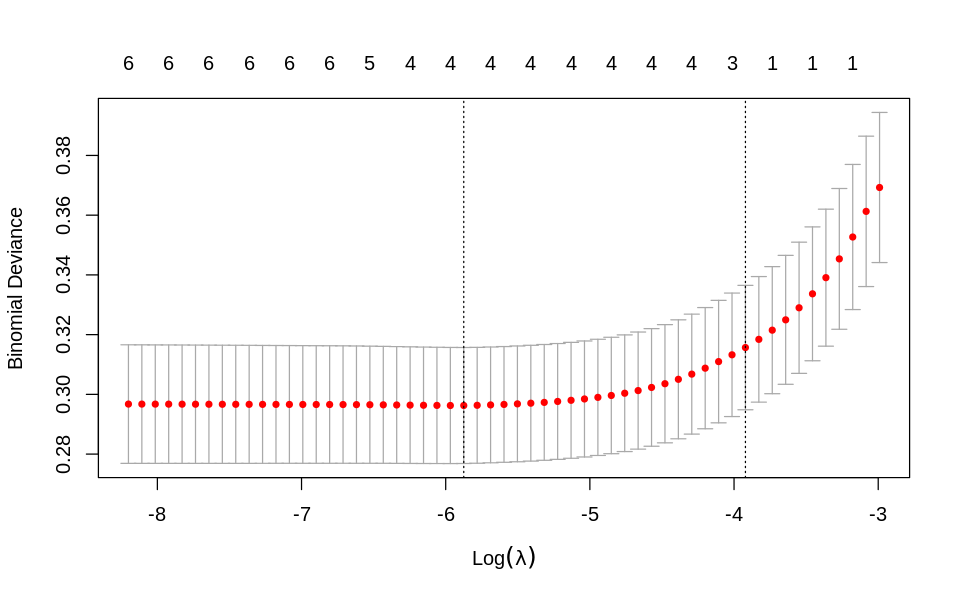

In [10]:
set.seed(1)
#run Lasso on the training_stroke and find the value lambda that provides the lowest Cross-validation MSE.
lasso_model <-
    cv.glmnet(training_stroke%>% select(-stroke) %>% as.matrix(), 
              training_stroke$stroke, 
              alpha = 1,
              family = "binomial",
             type.measure = "deviance")


lasso_model
options(repr.plot.width = 8, repr.plot.height = 5)
plot(lasso_model)

In [11]:
#extract the coefficients of the best lasso model found in the lasso_model. 
#by best, we mean the one with the smallest MSE.
beta_lasso<-coef(lasso_model, s=lasso_model$lambda.min)

beta_lasso

7 x 1 sparse Matrix of class "dgCMatrix"
                            s1
(Intercept)       -7.027508059
age                0.062170158
hypertension       0.511322881
heart_disease      0.375626074
ever_married       .          
avg_glucose_level  0.003173653
bmi                .          

In [12]:
#Extract the name of the covariates selected by Lasso in an object named lasso_selected_covariates.
lasso_selected_covariates <- as_tibble(
        as.matrix(beta_lasso),
        rownames='covariate') %>%
        filter(covariate != '(Intercept)' & abs(s1) !=0) %>% 
        pull(covariate)

lasso_selected_covariates

[1] "age"               "hypertension"      "heart_disease"    
[4] "avg_glucose_level"

In [13]:
#check the variance inflator factor of the variables selected by Lasso.
#and the lasso_variables_vif does not indicate a very concerning presence of multicollinearity.
lasso_variables_vif <- vif(lm(stroke ~ . , data = training_stroke %>% 
        select(contains(lasso_selected_covariates), stroke)))

lasso_variables_vif

age      hypertension     heart_disease avg_glucose_level 
         1.188716          1.102444          1.088193          1.088945

In [14]:
# use the covariates selected by lasso and stored in lasso_selected_covariates 
#to fit a generalized linear model.
inference_model <- 
    glm( stroke ~ .,
        data = testing_stroke %>% 
                   select(contains(lasso_selected_covariates), stroke),
       family=binomial)

#although the model stored in inference_model has shown non-significant variables, we don't 
#remove variables and refit at this stage .

In [15]:
#Use tidy() to the estimated effect each of the variables has on the odds.
tidy(inference_model, exponentiate = TRUE, conf.int = TRUE)%>% 
    mutate_if(is.numeric, round, 6)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.000386,0.741340,-10.600800,0.000000,0.000080,0.001486
age,1.065080,0.010641,5.925294,0.000000,1.044184,1.088814
hypertension,1.638437,0.338283,1.459556,0.144412,0.821952,3.119290
heart_disease,1.242211,0.454178,0.477551,0.632970,0.480450,2.896553
avg_glucose_level,1.007770,0.002441,3.170452,0.001522,1.002898,1.012580


With LASSO, I chose 4 explanatory variables which are age, hypertension, heart_disease and avg_glucose_level with training_stroke without obvious multicollinearity. Using a significance level 𝛼=0.05, the logistic regression results indicate that age and average glucose level are statistically significant predictors of stroke occurrence , with odds ratios of approximately 1.065 and 1.008, respectively. This suggests that, for each one-unit increase in age or average glucose level, the odds of experiencing a stroke increase by about 6.5% and 0.8%, respectively, while keeping the rest of the input variables constant. Hypertension, heart disease, and BMI do not appear to have statistically significant effects on stroke risk in this model. 

## 5. Reference

Emon et al. "Performance Analysis of Machine Learning Approaches in Stroke Prediction." *IEEE Xplore*,2020, https://ieeexplore.ieee.org/document/9297525/citations. Oct 12th.

"Stroke, Cerebrovascular accident." *World Health Organization*, 2023, https://www.emro.who.int/health-topics/stroke-cerebrovascular-accident/index.html. Oct 12th.

"Stroke Prediction Dataset." *kaggle*, https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. Oct 12th.